In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example of using numpy, pandas, and matplotlib

## Creating dataframe

In [2]:
df = pd.DataFrame(columns=['A', 'B', 'C'])

for col in df.columns:
    df[col] = np.random.lognormal(size=1000)

df['D'] = df['A'] * df['B']

df.head()

,A,B,C,D
0,1.635546,2.665985,0.134177,4.360341
1,0.156680,0.806060,3.295503,0.126293
2,3.075683,2.882355,0.496530,8.865208
3,0.860699,0.115899,0.264955,0.099754
4,1.329185,1.110408,0.662517,1.475937


## Taking the log, plotting the results

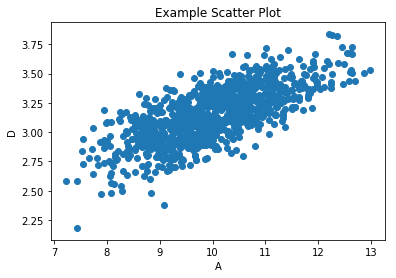

In [3]:
# Try out square rooting D

df_mod = np.log(df) + 10
df_mod['D'] = np.sqrt(df_mod['D'])

plt.scatter(df_mod['A'], df_mod['D'])
plt.xlabel('A')
plt.ylabel('D')
plt.title('Example Scatter Plot')
plt.show()

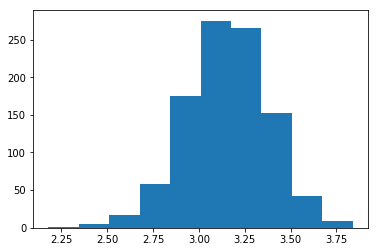

In [4]:
plt.hist(df_mod['D'])
plt.show()

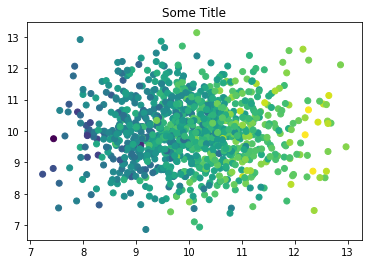

In [5]:
plt.scatter(df_mod['A'], df_mod['C'], c=df_mod['D'])
plt.title('Some Title')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_mod[['A', 'C']], df_mod['D'])

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()

line.fit(X_train, Y_train)

print('Train score: ', line.score(X_train, Y_train))

print('Test score: ', line.score(X_test, Y_test))


Train score:  0.5127371977828923
Test score:  0.4720534406064833


In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train, Y_train)

print('Train score: ', lasso.score(X_train, Y_train))

print('Test score: ', lasso.score(X_test, Y_test))

Train score:  0.5092106344184583
Test score:  0.4832178495302669
